In [1]:
# Amplitude plot


from matplotlib import patches as ptc
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
import pickle


In [2]:
data_dir = "../../../data/kagome-02.26.2022-center-sim/"
out_dir = "../../../paper_new/real_space_fig/"

In [42]:
def central_cut(real_data, source_pos, edge_relax):
    """
    Get the central hexagonal part of the real space data.
    real_data: [[x_coord, y_coord, amp, phase], ...].
    Also shift the origin to the source position
    """
    
    x = real_data[:, 0] - source_pos[0]
    y = real_data[:, 1] - source_pos[1]
    amp = real_data[:, 2]
    phase = real_data[:, 3]

    x_unit = 10*np.sqrt(3)/4*1e-3
    y_unit = 7.5*1e-3

    # Get the central hexagon
    y_mask = (np.abs(y) <= y_unit*8.2) 
    xy_mask_1 = (np.abs(y+y_unit/x_unit*x) <= y_unit*16+edge_relax)
    xy_mask_2 = (np.abs(y-y_unit/x_unit*x) <= y_unit*16+edge_relax)
    source_mask = (np.sqrt(x**2 + y**2) > edge_relax)  # Avoid the source point
    mask = y_mask & xy_mask_1 & xy_mask_2 & source_mask


    return np.column_stack((x[mask], y[mask], amp[mask], phase[mask]))

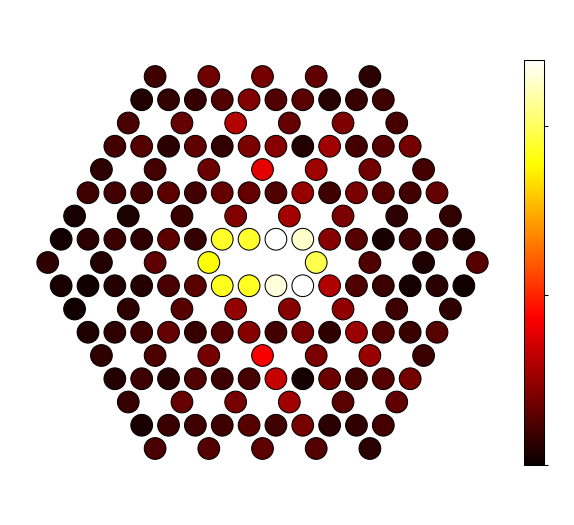

In [57]:
freq = 14.4

with open(data_dir + f"preprocessed/_{int(freq*1e3)}.0_0.pkl",'rb') as f:
    real_data = pickle.load(f) 
    real_data = np.array(real_data)

x_unit = 10*np.sqrt(3)/4*1e-3
y_unit = 7.5*1e-3
radius = 3.5*1e-3

data_central = central_cut(real_data, source_pos=(2*x_unit, 0), edge_relax=radius*0.2)

preamp_gain = 1
mic_gain = 1

cavities = []
ampdata = []
phasedata = []


max_amp = max(data_central[:,2])/preamp_gain/mic_gain

fig = plt.figure(figsize=(2.5,2.5), dpi=300)
ax = fig.gca()
ax.set_aspect("equal")
ax.set_xlim(-75*1e-3, 75*1e-3)
ax.set_ylim(-75*1e-3, 75*1e-3)
ax.axis('off')
plt.yticks([])
plt.xticks([])
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=max_amp), cmap = "hot"), ax=ax, shrink=0.7)


ampdata = []
phasedata = []
    


for point in data_central:
    x_center = point[0]
    y_center = point[1]
    
    ampdata.append(point[2]/preamp_gain/mic_gain)
    phasedata.append(point[3])
    
    circle = ptc.Ellipse((x_center, y_center), 
                     width = radius*2, 
                     height = radius*2, 
                     edgecolor='black', facecolor = plt.cm.hot(ampdata[-1]/max_amp),
                     fill = True, alpha = 1, linewidth=0.25)
    cavities.append(circle)
    ax.add_patch(cavities[-1])


cbar.set_ticks(np.linspace(0, 800, 3))
cbar.outline.set_linewidth(0.25)
cbar.ax.set_yticklabels(['','',''])
cbar.ax.tick_params(width=0.25, length = 1)
plt.savefig(out_dir + f"amplitude_plot_{freq}kHz-sim.pdf", bbox_inches='tight')

In [49]:
print(max_amp)

954.9302188996903


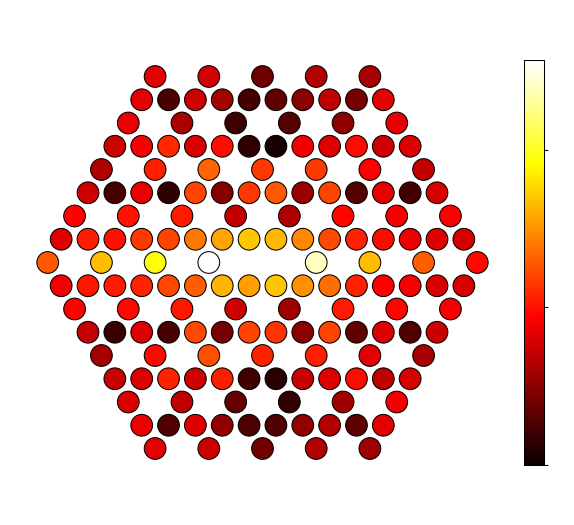

In [56]:
freq = 7

with open(data_dir + f"preprocessed/_{int(freq*1e3)}.0_0.pkl",'rb') as f:
    real_data = pickle.load(f) 
    real_data = np.array(real_data)

x_unit = 10*np.sqrt(3)/4*1e-3
y_unit = 7.5*1e-3
radius = 3.5*1e-3

data_central = central_cut(real_data, source_pos=(2*x_unit, 0), edge_relax=radius*0.2)

preamp_gain = 1
mic_gain = 1

cavities = []
ampdata = []
phasedata = []


max_amp = max(data_central[:,2])/preamp_gain/mic_gain

fig = plt.figure(figsize=(2.5,2.5), dpi=300)
ax = fig.gca()
ax.set_aspect("equal")
ax.set_xlim(-75*1e-3, 75*1e-3)
ax.set_ylim(-75*1e-3, 75*1e-3)
ax.axis('off')
plt.yticks([])
plt.xticks([])
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=max_amp), cmap = "hot"), ax=ax, shrink=0.7)


ampdata = []
phasedata = []
    


for point in data_central:
    x_center = point[0]
    y_center = point[1]
    
    ampdata.append(point[2]/preamp_gain/mic_gain)
    phasedata.append(point[3])
    
    circle = ptc.Ellipse((x_center, y_center), 
                     width = radius*2, 
                     height = radius*2, 
                     edgecolor='black', facecolor = plt.cm.hot(ampdata[-1]/max_amp),
                     fill = True, alpha = 1, linewidth=0.25)
    cavities.append(circle)
    ax.add_patch(cavities[-1])


cbar.set_ticks(np.linspace(0, 600, 3))
cbar.outline.set_linewidth(0.25)
cbar.ax.set_yticklabels(['','',''])
cbar.ax.tick_params(width=0.25, length = 1)
plt.savefig(out_dir + f"amplitude_plot_{freq}kHz-sim.pdf", bbox_inches='tight')

In [52]:
print(max_amp)

770.8526301637057
